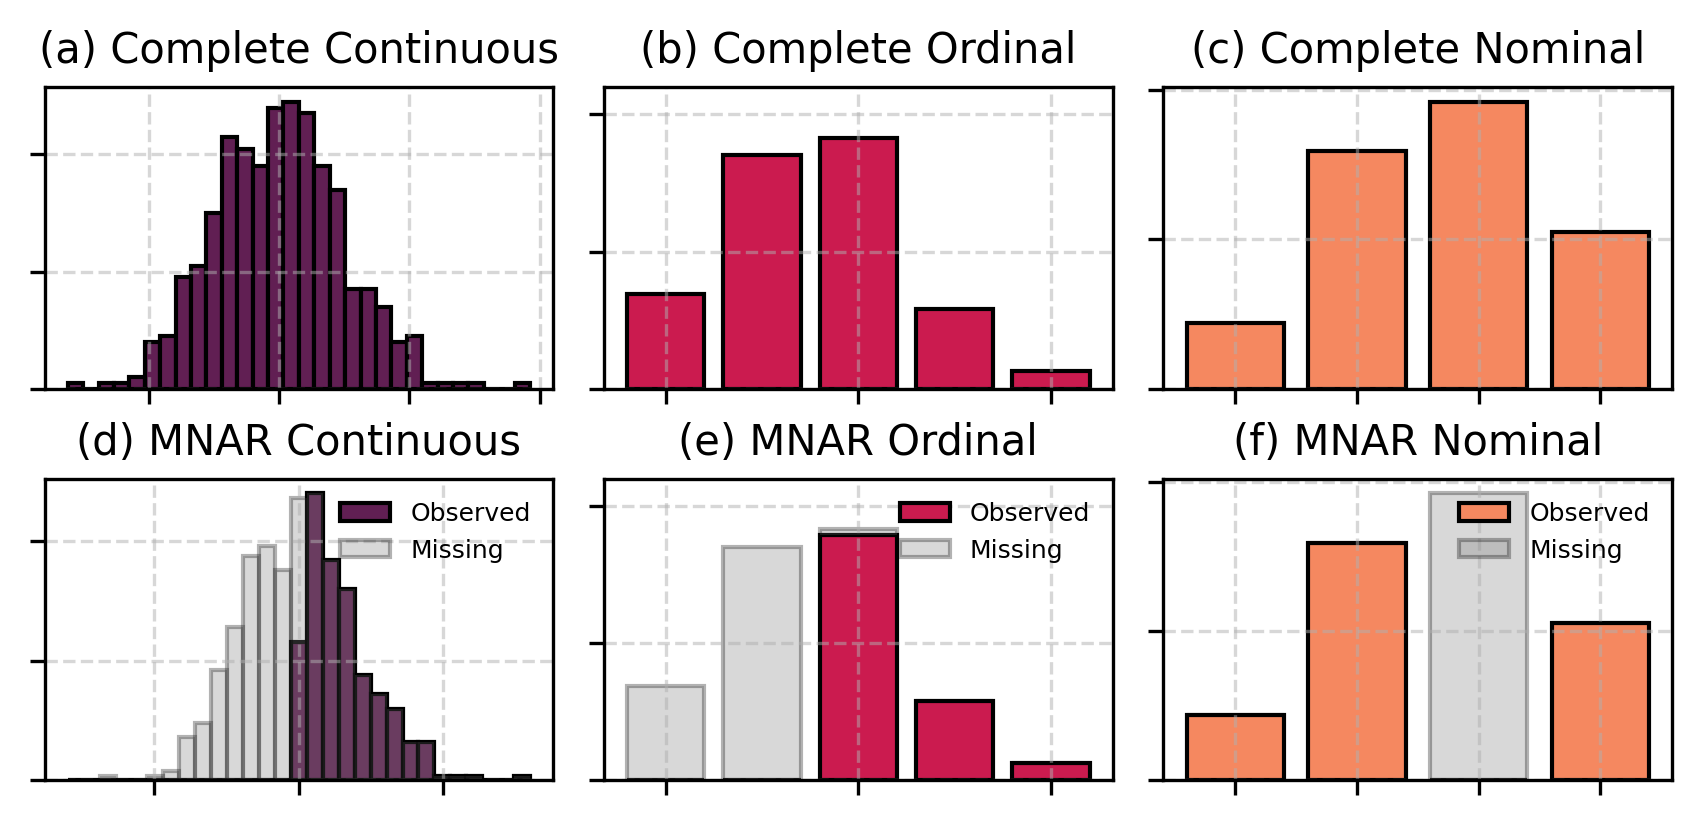

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# 颜色方案 (rocket colormap)
import seaborn as sns
colors = sns.color_palette("rocket", 3)  # 列表，每个元素是 (r,g,b)

# 生成数据
np.random.seed(42)
n = 500

# Continuous: standard normal
cont_data = np.random.normal(0, 1, n)

# Ordinal: discretized normal (5 bins)
ordinal_bins = np.digitize(cont_data, bins=np.linspace(-2, 2, 5))
ordinal_counts = np.bincount(ordinal_bins, minlength=6)[1:]

# Nominal: categorical
nominal_categories = np.random.choice(["A", "B", "C", "D"], size=n,
                                      p=[0.1, 0.3, 0.4, 0.2])
nominal_counts = {cat: np.sum(nominal_categories == cat) for cat in np.unique(nominal_categories)}

# MNAR: values < median missing
cont_mnar = cont_data.copy()
cont_mnar[cont_mnar < np.median(cont_data)] = np.nan

ordinal_mnar = ordinal_bins.copy()
ordinal_mnar[cont_data < np.median(cont_data)] = -1  # -1 表示缺失

nominal_mnar = nominal_categories.copy()
nominal_mnar[nominal_mnar == "C"] = None  # 类别 C 完全缺失

# 创建 2x3 图
fig, axes = plt.subplots(2, 3, figsize=(7, 3), dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# --- Row 1: Complete Data --- #
# Continuous
axes[0, 0].hist(cont_data, bins=30, color=colors[0], alpha=1, edgecolor="black" )
# axes[0, 0].set_title("Complete Continuous")

# Ordinal
axes[0, 1].bar(range(len(ordinal_counts)), ordinal_counts, color=colors[1], edgecolor="black")
# axes[0, 1].set_title("Complete Ordinal")

# Nominal
axes[0, 2].bar(nominal_counts.keys(), nominal_counts.values(), color=colors[2], edgecolor="black")
# axes[0, 2].set_title("Complete Nominal")

# --- Row 2: MNAR --- #
# Continuous
bins = np.linspace(-4, 4, 30)
axes[1, 0].hist(cont_mnar[~np.isnan(cont_mnar)], bins=bins, color=colors[0], alpha=1, label="Observed", edgecolor="black")
axes[1, 0].hist(cont_data, bins=bins, color="gray", alpha=0.3, label="Missing", edgecolor="black")
# axes[1, 0].set_title("MNAR Continuous")
axes[1, 0].legend(frameon=False, loc="upper right", fontsize=6)

# Ordinal
counts_obs = np.bincount(ordinal_mnar[ordinal_mnar != -1], minlength=6)[1:]
axes[1, 1].bar(range(len(counts_obs)), counts_obs, color=colors[1], alpha=1, label="Observed", edgecolor="black")
axes[1, 1].bar(range(len(counts_obs)), ordinal_counts - counts_obs, bottom=counts_obs,
               color="gray", alpha=0.3, label="Missing", edgecolor="black")
# axes[1, 1].set_title("MNAR Ordinal")
axes[1, 1].legend(frameon=False, loc="upper right", fontsize=6)

# Nominal
counts_nominal_obs = {cat: np.sum(nominal_mnar == cat) for cat in np.unique(nominal_categories)}
axes[1, 2].bar(counts_nominal_obs.keys(), counts_nominal_obs.values(),
               color=colors[2], alpha=1, label="Observed", edgecolor="black")
missing_nominal = {cat: nominal_counts[cat] - counts_nominal_obs.get(cat, 0) for cat in nominal_counts}
axes[1, 2].bar(missing_nominal.keys(), missing_nominal.values(),
               bottom=list(counts_nominal_obs.values()),
               color="gray", alpha=0.3, label="Missing", edgecolor="black")
# axes[1, 2].set_title("MNAR Nominal")
axes[1, 2].legend(frameon=False, loc="upper right", fontsize=6)

# 去掉 y 轴数字，但保留网格
for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.set_xlabel("")
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)
    ax.grid(True, axis="x", linestyle="--", alpha=0.5)

axes[0, 1].set_ylim(0, max(ordinal_counts) * 1.2)
axes[1, 1].set_ylim(0, max(ordinal_counts) * 1.2)


axes[0,0].set_title("(a) Complete Continuous", fontsize=10)
axes[0,1].set_title("(b) Complete Ordinal", fontsize=10)
axes[0,2].set_title("(c) Complete Nominal", fontsize=10)
axes[1,0].set_title("(d) MNAR Continuous", fontsize=10)
axes[1,1].set_title("(e) MNAR Ordinal", fontsize=10)
axes[1,2].set_title("(f) MNAR Nominal", fontsize=10)


plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.savefig('images/incomplete_distribution.pdf', bbox_inches="tight")



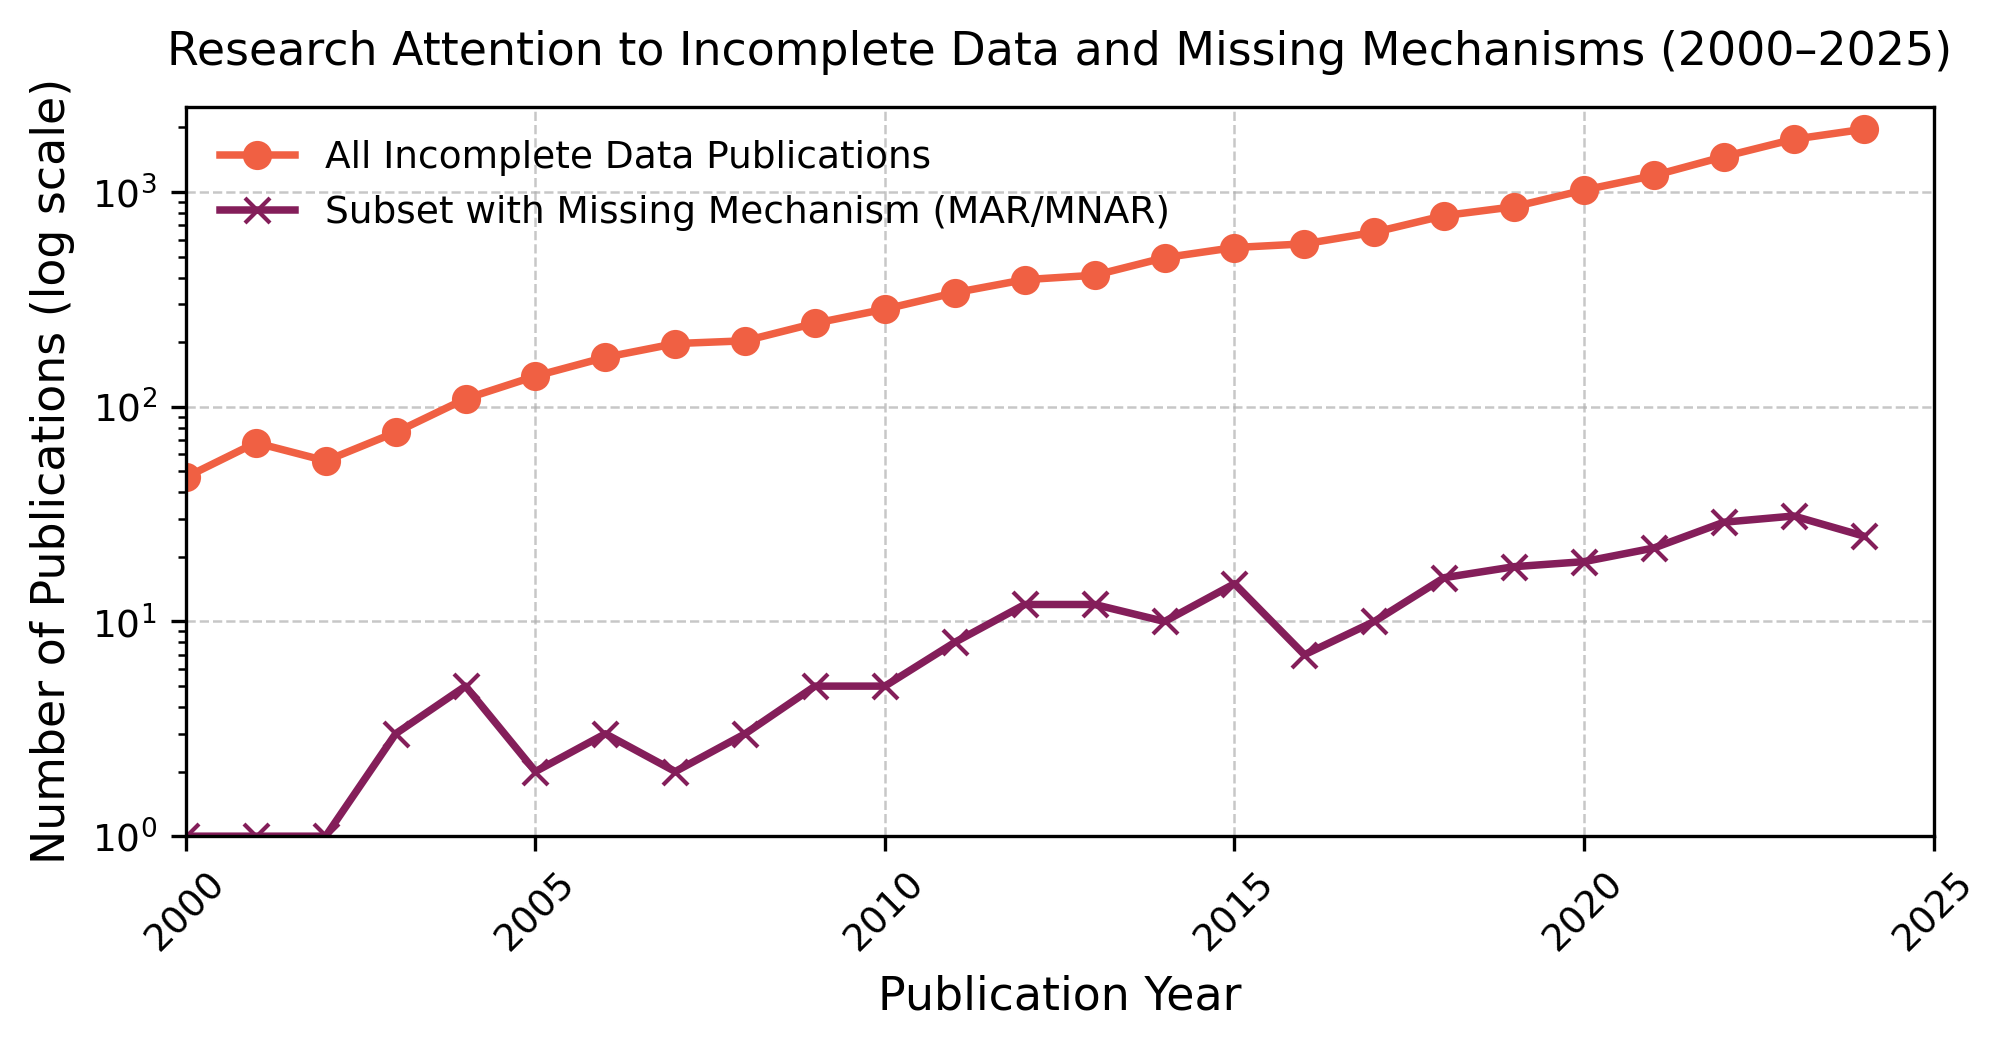

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用 rocket 色盘
colors = sns.color_palette("rocket", 2)
plt.rcParams['font.family'] = 'sans-serif'
# 数据
mar_mnar = {
    2000:1,2001:1,2002:1,2003:3,2004:5,2005:2,2006:3,2007:2,2008:3,2009:5,
    2010:5,2011:8,2012:12,2013:12,2014:10,2015:15,2016:7,2017:10,2018:16,
    2019:18,2020:19,2021:22,2022:29,2023:31,2024:25
}
all_articles = {
    2000:47,2001:68,2002:56,2003:76,2004:109,2005:139,2006:170,2007:197,
    2008:203,2009:245,2010:285,2011:340,2012:391,2013:410,2014:495,2015:552,
    2016:574,2017:650,2018:777,2019:855,2020:1022,2021:1195,2022:1463,
    2023:1763,2024:1963
}

# 转为 list
x1, y1 = zip(*mar_mnar.items())
x2, y2 = zip(*all_articles.items())

# 画图
plt.figure(figsize=(6.8, 3.6), dpi=300)  # 双栏论文推荐尺寸

plt.plot(x2, y2, marker="o", color=colors[1], linewidth=1.8, label="All Incomplete Data Publications")
plt.plot(x1, y1, marker="x", color=colors[0], linewidth=1.8, label="Subset with Missing Mechanism (MAR/MNAR)")

# y 轴对数
plt.yscale("log")
plt.xlim(2000, 2025)
plt.ylim(1, 2500)

# 标签
plt.xlabel("Publication Year", fontsize=11)
plt.ylabel("Number of Publications (log scale)", fontsize=11)

# 刻度
plt.xticks([2000,2005,2010,2015,2020,2025], fontsize=9, rotation=45)
plt.yticks(fontsize=9)

# 图例
plt.legend(loc="upper left", fontsize=9, frameon=False)

# 网格
plt.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)

plt.title("Research Attention to Incomplete Data and Missing Mechanisms (2000–2025)", 
          fontsize=11, pad=10)

plt.tight_layout()
plt.savefig('images/timeline.pdf', bbox_inches="tight")